<a href="https://colab.research.google.com/github/44REAM/AI_mahidol/blob/master/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent variable

Latent variables are variable that you not directly observed. But sometime we can construct that variables from physical reality.

For example

1. In advertising

You can collect data of person (e.g. ages, sex, what product they like to buy) and use their data to predict what they want to buy. But you cannot record their emotion and emotion may effect the decision whether they want to buy the product. And emotion is your latent variable.

# General EM algolithm


> $\theta$ = {set of constant parameter} \
> $X$ is random variable \
> $Z$ is latent random variable


likelihood function $p(X \mid \theta)$

$$p(X \mid \theta) = \sum_{z} p(X, Z \mid \theta)$$

$$ln \ p(X \mid \theta) = ln\sum_{z} p(X, Z \mid \theta)$$


### ***Algorithm*** 



---


> Initial random parameter $\theta$

> E-Step

Evaluate

$$q(Z) = p(Z \mid X, \theta_{old})$$

> M-Step

Find $\theta_{new}$

$$\theta_{new} = \underset{\theta}{argmax} \ E[p(X,Z \mid \theta)]$$


---





## Jensen inequality
---


Log function is concave function

![alt text](https://drive.google.com/uc?id=1Rlud2niSCB-mrFBh9kXI-ucRnOGiFezD)

![alt text](https://drive.google.com/uc?id=1Do8xLyMdS3-jNXgny0GFxFrwzmdnlQML)

for $0 \leqslant \alpha \leqslant 1$

$$f(\alpha v_1 + (1-\alpha)v_2) \geqslant \alpha f(v_1) + (1-\alpha)f(v_2)$$

It still true if you have more point

$$f(\sum \alpha_k v_k) \geqslant \sum \alpha_k f(v_k)$$

$$\boxed{f(E[v]) \geqslant E[f(v)]}$$ \

---



Add $q(Z)$



> You can view  $q(Z)$ as another distribution of random variable Z like $p(Z \mid X, \theta_2)$ (use different parameter $\theta$)

$$ln \ p(X \mid \theta) = ln\sum_{z} p(X, Z \mid \theta)$$

$$ln(p(X \mid \theta)) = ln [ \sum_{z} \frac{q(Z)}{q(Z)} p(X, Z  \mid \theta)]$$

And $ln$ is concave function.

$$f(\sum \alpha_k v_k) \geqslant \sum \alpha_k f(v_k)$$

$$ln(p(X \mid \theta)) = ln [ \sum_{z} \frac{q(Z )}{q(Z )} p(X, z  \mid \theta)] \geqslant \sum_z q(Z  )ln \frac{p(X, Z \mid \theta)}{q(Z)}$$

$$\boxed{ln(p(X \mid \theta)) \geqslant \sum_z q(Z ) \ ln \frac{p(X, Z  \mid \theta)}{q(Z)}}$$

So we can maximize $\sum_z q(Z ) \ ln \frac{p(X, Z \mid \theta)}{q(Z)}$ instead.

But before that let look at the gap first.

$$GAP =ln(p(X \mid \theta)) -  \sum_z q(Z  ) \ ln \frac{p(X, Z  \mid \theta)}{q(Z)}$$

$$GAP =ln [ \sum_{z} \frac{q(Z )}{q(Z )} p(X, z  \mid \theta)] -  \sum_z q(Z) \ ln \frac{p(X, Z  \mid \theta)}{q(Z )}$$

$$GAP =\sum_z q(Z)[ ln(p(X \mid \theta)) -   \ ln \frac{p(X, Z \mid \theta)}{q(Z)}]$$

$$GAP =\sum_z q(Z) \ ln \frac{p(X \mid \theta)q(Z)}{p(X,Z \mid \theta)}$$

$$GAP =\sum_z q(Z ) \ ln \frac{p(X \mid \theta)q(Z)}{p(Z\mid X, \theta)p(X \mid \theta)}$$

$$GAP =\sum_z q(Z ) \ ln \frac{q(Z )}{p(Z \mid X, \theta)}$$

Conclusion

$$\boxed{ln(p(X \mid \theta)) = \underbrace{\sum_z q(Z) ln\frac{p(X,Z\mid \theta)}{q(Z)}}_\text{Lower Bound} +\underbrace{ \sum_z q(Z) ln\frac{q(Z)}{p(Z \mid X, \theta)}}_\text{KL-divergence}}$$

![alt text](https://drive.google.com/uc?id=1ZMFFi3o5TGZSZn44r5ZAd5eP_cUhFvfp)

The first term on the right size that came from jensen inequality call "lower bound" $L(\theta,q)$ and the second term is the "GAP". So, what we want is try to maximize the lower bound or minimize the GAP. And when you look at GAP it may remind you of KL-divergence. 

To minimum KL-divergence you get $$q(Z)= p(Z \mid X, \theta)$$

And try to maximum first term $L(\theta,q)$

$$\sum_z q(Z ) ln\frac{p(X,Z\mid \theta)}{q(z)} = \sum_z q(Z ) ln \ p(X,Z\mid \theta) - Constant$$

$$\sum_z q(Z ) ln\frac{p(X,Z \mid \theta)}{q(Z)} \propto \sum_z q(Z ) ln \ p(X,Z \mid \theta)$$

$$\boxed{L(\theta,q) \propto \sum_z q(Z ) ln \ p(X,Z \mid \theta)}$$



## KL-divergence

One way to view entropy is the way that information can distribute in the system.

entropy can write as $H(p)$

$$\boxed{H(p) = -\sum p(X)log(p(X))}$$

> For example

![alt text](https://drive.google.com/uc?id=1uhZha2DtbGKWnycIhw3eIkIKr6P8bxG3)

You at the receiver side, you can get one or zero at p = 0.5. And when you guess the number you have a change that you wrong. But if you know that you will get one at probability 1 and get zero at probability 0, you can always get correct answer. This is mean the system 1 have more information than system 2. Then system 1 have more entropy than system 2.

Cross entropy

$$\boxed{H(q,p) = -\sum q(X)log(p(X))}$$

> Another example [Ref](https://www.quora.com/Whats-an-intuitive-way-to-think-of-cross-entropy)

Your goal is to ask lowest question to get the answer

*   Game 1 every ball have same probability (0.25)

![alt text](https://drive.google.com/uc?id=10mQuYRjxmXSXbl2Qdu5loSe4oCV2coJE)

$2*0.25 + 2*0.25 + 2*0.25 + 2*0.25 = 2$

*   Game 2 blue (p = 0.5) red (p = 0.25) green and yellow (p = 0.125)

![alt text](https://drive.google.com/uc?id=1StbxF1j0y5TWHYG0_Eauc3W7eKsXQ_mo)

$1*0.5 + 2*0.25 + 3*0.125 + 3*0.125 = 1.75$

If you use strategy of game 1 to play in game 2 you get

$2*0.5 + 2*0.25 + 2*0.125 + 2*0.125 = 2$

cross entropy $H(q,p)$

$$-\sum q(X)log(p(X)) \geqslant -\sum q(X)log(q(X))$$

$$H(q,p) \geqslant H(q)$$

KL-divergence $D_{KL}(q || p)$

$$ - \underbrace{\sum q(X)log(p(X))}_\text{Cross entropy q and p} -[ \underbrace{-\sum q(X)log(q(X))}_\text{entropy of q}]$$

$$ = \sum q(X)\frac{log(q(X))}{log(p(X))} \geqslant 0$$

Note that you can use jensen inequality to check that $D_{KL}(q || p)\geqslant 0$ 


# GMM (Gaussian mixture model)

![alt text](https://drive.google.com/uc?id=1gjilUVmv2H0mL4f9ZdrFEFpKivuUEjQr)

![alt text](https://drive.google.com/uc?id=1sfuaeJpyziHQbhIIBu38TzqwGggjzITY)

![alt text](https://drive.google.com/uc?id=1Q_AQJtgGlK0nMEhbK67aELSHGhQE39ar)

![alt text](https://drive.google.com/uc?id=1MqIULg0zfezXSioGl84JfTOmblfDlTwS)

![alt text](https://drive.google.com/uc?id=1Fe0VJt2jULPruSUxt3wuTRyDFuj8t23C)

![alt text](https://drive.google.com/uc?id=1Z4lRg2J9g-cWvGOBmGuYjEPRf1Xi7jbN)

We can build simple graphical model like this

![alt text](https://drive.google.com/uc?id=1LD2ZTFrx5iNeLN-WPUvUXuTxX1LAtX5x)

![alt text](https://drive.google.com/uc?id=1CMvjwQ44Ir2z-BsmLYJIrvdSUmiguZBS)

For full version of graphical model let look at wiki https://en.wikipedia.org/wiki/Mixture_model

### image segmentation

![alt text](https://drive.google.com/uc?id=1te0N4nO55JeX6PROSmLljg08cBh6LinT)






Let 

> $z \thicksim Categorical(\pi)$ \
> $X \thicksim Normal(\mu, \sigma)$ \
> $i$ is denote sample number i \
> $k$ = number of category \
> $\theta$ = {$\pi = probability \ of \ the \ cluster, \mu, \sigma$}

We want   $p(z \mid x)$

$$p(z \mid x) = \frac{p(x,z)}{p(x)}$$

$$p(z \mid x) = \frac{p(x \mid z)p(z)}{p(x)}$$

Find $p(x)$

$$p(x) = \sum_{all \ z} p(x,z)$$

$$\boxed{p(x) = \sum_{all \ z} p(z)p(x \mid z)}$$

Define $p(z = k)$

$$\boxed{p(z = k) = \pi_k}$$

Model $p(x \mid z = k)$ as gaussian

$$\boxed{p(x \mid z = k) = \mathcal{N}(x \mid \mu_k, \sigma_k)}$$

you got 

$$p(z = k \mid x) = \frac{p(z=k,x)}{p(x)}$$

$$p(z \mid x) = \frac{p(x \mid z)p(z)}{p(x)}$$

$$\boxed{p(z = k \mid x) = \frac{\pi_k \mathcal{N}(x \mid \mu_k, \sigma_k)}{\sum_{k} \pi_k \mathcal{N}(x \mid \mu_k, \sigma_k)}}$$

I will write $p(z=k \mid x)$ as function $q(z=k)$

## EM Algorithm for GMM

> initialize parameter $\theta$

> E-step

$$q(z=k) = p(z=k \mid X,\theta_{old})$$

$$q(z_i=k) = \frac{\pi_k^{old} \mathcal{N}(x_i \mid \mu_k^{old}, \sigma_k^{old})}{\sum_{k} \pi_k^{old} \mathcal{N}(x_i \mid \mu_k^{old}, \sigma_k^{old})}$$

> M-step maximize $L(\theta,q)$

$L(\theta,q) \propto \sum_k q(z =k) ln \ p(X,z =k\mid \theta)$

$L(\theta,q) \propto \sum_k q(z =k) ln \ \pi_k \mathcal{N}(x \mid \mu_k, \sigma_k)$

$\frac{ \partial L(\theta,q)}{\partial u_k^{new}} = 0$

$$\boxed {\mu_k^{new} = \frac{1}{N_k} \sum_i q(z_{i} = k)x_i}$$

$\frac{ \partial L(\theta,q)}{\partial \sigma_k^{new}} = 0$

$$\boxed {\sigma_k^{new} = \frac{1}{N_k} \sum_i q(z_{i} = k)(x_i-\mu_k^{new})(x_i-\mu_k^{new})^T}$$

$\frac{ \partial L(\theta,q)}{\partial \pi_k^{new}} = \lambda \frac{\partial \ Constrain}{\partial \pi_k^{new}}$ for $\lambda$ is Lagrange multiplier

$$\boxed{\pi_k = \frac{N_k}{N}}$$



For we define

$$N_k = \sum_i q(z_i =k)$$

## Programming
### Generate Data

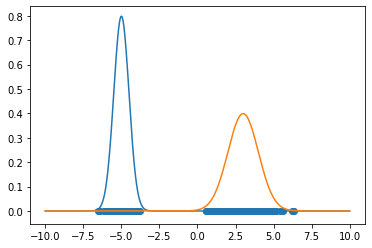

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans

x1 = np.random.randn(200)*0.5-5
x2 = np.random.randn(500) + 3
x3 = np.random.randn(30)*1.5+5

y = np.zeros(700)

x = np.concatenate((x1,x2))
g1 = np.linspace(-10,10,1000)
y1 = norm.pdf(g1, -5,0.5)

g2 = np.linspace(-10,10,1000)
y2 = norm.pdf(g2, 3, 1)

plt.plot(g1,y1)
plt.plot(g2,y2)
plt.scatter(x,y)
plt.show()

### Algorithm

In [0]:
# It is better if you initialize with K-mean first to help GMM convert faster
def initialize(cluster):
  mu = np.random.uniform(-6,9,size = cluster)
  sigma = np.random.uniform(size = cluster)
  pi = np.random.uniform(size = cluster)
  pi = pi/pi.sum()
  return mu, sigma, pi

def initialize_k_mean(data, cluster):

  kmeans = KMeans(n_clusters=2, random_state=0).fit(data.reshape((-1,1)))
  mu = kmeans.cluster_centers_.reshape(cluster)

  sigma = np.random.uniform(size = cluster)
  pi = np.ones(cluster)/cluster
  return mu, sigma, pi

def e_step(data,cluster, mu, sigma, pi):
  # for calculate pdf of Gaussian you can search google for gaussian equation or use scipy.stats.norm
  gamma = []
  tmp = []
  for k in range(cluster):
    tmp.append(norm.pdf(data,mu[k],sigma[k])*pi[k])
  tmp = np.array(tmp)
  sum_k = tmp.sum(axis=0)

  for k in range(cluster):
    gamma.append(norm.pdf(data,mu[k],sigma[k])*pi[k]/sum_k)

  gamma = np.array(gamma)
  return gamma

def m_step(data,cluster, gamma):
  N_k = gamma.sum(axis = 1)

  all_data = np.array([data]*cluster)

  # mu
  mu_new = (gamma*data).sum(axis = 1)/N_k

  #sigma
  data_sub_mean = all_data - mu_new.reshape((cluster,-1))
  sigma_new = ((gamma*( data_sub_mean**2 )).sum(axis = 1))/N_k
  sigma_new = np.sqrt(sigma_new)

  #pi
  pi_new = N_k/N_k.sum()

  return mu_new, sigma_new, pi_new


[ 3.06524601 -5.07899346]


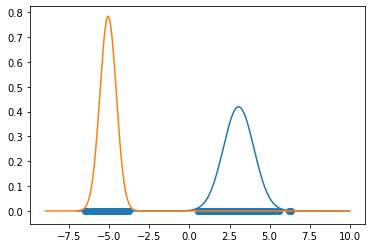

In [4]:


epoch = 100
cluster = 2
data = x

mu, sigma, pi = initialize_k_mean(data, cluster)

for i in range(epoch):
  q = e_step(data,cluster, mu, sigma, pi)

  mu, sigma, pi = m_step(data,cluster, q)


g1 = np.linspace(-7,10,1000)
y1 = norm.pdf(g1, mu[0], sigma[0])

g2 = np.linspace(-9,10,1000)
y2 = norm.pdf(g2, mu[1], sigma[1])

print(mu)

plt.plot(g1,y1)
plt.plot(g2,y2)
plt.scatter(x,y)
plt.show()




# PCA (Principal component analysis)

If you have many variable (feature) in your data,sometime you may want to reduced the variable (feature) that insert into your model. In otherword you may want to reduce the dimension of your feature space but still preserved the information of your data.

## Normal approach

*   Substract mean from dataset first.
*   $w$ is unit vector parallel to the axis that have most variance
*   X is two dimension matrix $m \times n$ for $m$ is number of dataset and $n$ is number of feature

You want to maximum the variance of $Xw$ subject to $w$ is unit vector

> Maximum $||Xw||^2$ \
> Subject to  $||w||^2 = 1$

You can construct lagrange function $\mathcal{L}$

$$\mathcal{L}(X,w,\lambda) = ||Xw||^2 - \lambda||w||^2$$

> for $\lambda$ is lagrange constant

you want to find $w$ so just differentiate with w.

$$\frac{ \partial ||Xw||^2}{\partial w} = \lambda \frac{\partial{||w||^2}}{\partial w}$$

$$ X^TXw = C w$$ for $C$ is some constant

Went you look to the equation it may remind you of something. It is eigenvector/eigenvalue equation.

Let $A = X^TX$

$$ Aw = Cw$$

or 

$$A = V \Lambda V^{-1}$$

> $V$ is eigenvector matrix \
> $\Lambda$ is eigenvalue matrix

So you just find the eigenvector of A and you got the solution $V$ but $V$ is the matrix of all eigenvector, so what eigenvector we should use?

Let do SVD of X

$$X = U\Sigma R^T$$

$$X^TX = R\Sigma U^T U\Sigma R^T$$

$$X^TX = R\Sigma^2 R^T$$

$$A = R\Sigma^2 R^T = V \Lambda V^{-1}$$

So
> $V$ = $R$ \
> $\Lambda$ = $\Sigma^2$

And you get 

$$XV = U\Sigma$$

Let look at what we want first, we want $Xw$ maximum and you know that w is in $V$

Because $U$ is orthonormal matrix the variance in collumn is = 1, we should select where $U\Sigma$ is maximum. And that mean select the eigenvector where the eigenvalue is maximum.




## Programming

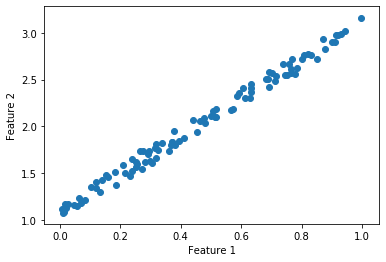

In [0]:
import numpy as np
import matplotlib.pyplot as plt

size = 100
x = np.random.uniform(0,1, size = size)

y = 2*x +1 + np.random.uniform(0,0.2, size = size)

y = y.reshape((size,1))
x = x.reshape((size,1))

dataset = np.concatenate((x,y) , axis = 1)


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(x,y)
plt.show()

Substract mean from dataset 

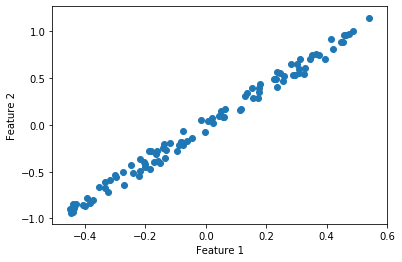

In [0]:
dataset_norm = dataset- dataset.mean(axis = 0)

x = dataset_norm.T[0]
y = dataset_norm.T[1]


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(x,y)
plt.show()

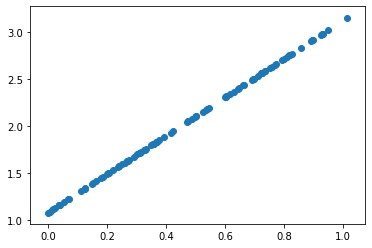

In [0]:
cov = dataset_norm.T.dot(dataset_norm)
eig_value, eig_vector = np.linalg.eigh(cov)

max_eig_vector = eig_vector[-1].reshape((2,1))

after_pca = dataset_norm.dot(max_eig_vector)
inv_pca = after_pca.dot(max_eig_vector.T) + dataset.mean(axis = 0)

plot_inv_pca = inv_pca.T

plt.scatter(plot_inv_pca[0], plot_inv_pca[1])


## PCA with kernel

let $x,z \in X$

Introduce mapping function $\phi:X \rightarrow \mathcal{R^n}$

and kernel function $k(x,z) = \langle \phi(x) ,\phi(z) \rangle$

Mapping function change data from feature space to kernel space to make it more simple to analyse.

Example

$\phi (x) = x \ mod \ 2$ 

map feature from 1 dimension into 2 dimension space

![alt text](https://drive.google.com/uc?id=1zb3W5BW0k_AuKFOenbv9zr0wUpaLLOOz)

![alt text](https://drive.google.com/uc?id=1NXHZc2mb9egsPuUhNADZ0yaDDH7F3106)


## Probabilistic PCA

# Variational inference

Sometime calculate the posterior distribution is complex so, we want to simplify a function that we want to calculate.

You can view variation technique as function that take function as input, for example, entropy $H(p)$ which take function $p(x)$ as input

$$H(p) = -\sum p(x)ln \ p(x)$$



For more concrete example

You want to find a path from point a to point b that take least time.

![alt text](https://drive.google.com/uc?id=1EA86kZXs5J_5eZQPognVg2qhXVB_pFF6)

$$time = \frac{distance}{velocity}$$

Distance

$$d \ distance = \sqrt{dx^2 + dy^2}$$

$$d \ distance = \sqrt{1 + (\frac{dy}{dx})^2} dx$$

$$velocity = v(x,y)$$

$$time = \int_A^B \frac{ \sqrt{1 + (\frac{dy}{dx})^2}}{v(x,y)}dx$$

$$time = \int_A^B L(x,y,y') dx$$

Instead of find the minimum time, we find $y(x)$ that can make time minimum.

![alt text](https://drive.google.com/uc?id=1xRfzZgt59ERVSN-8ssEAAVr-SmN8zpd4)

Because in e step we have to calculate $p(Z \mid X) = \frac{p(Z,X)}{\int_z p(X,Z)}$

and set $q(Z) = p(Z \mid X)$

if you have more than one latent variable, we then assume the q distribution can factorize

$$q(Z) = \prod_j q_j(Z_j)$$

But sometion the computational complexity of the integral part is high so, you have to use other method to find posterior instead.

$$\boxed{ln(p(X \mid \theta)) = \underbrace{\sum_z q(Z) ln\frac{p(X,Z\mid \theta)}{q(Z)}}_\text{Lower Bound} +\underbrace{ \sum_z q(Z) ln\frac{q(Z)}{p(Z \mid X, \theta)}}_\text{KL-divergence}}$$

Now, we want the distribution $q$ that make $L$ largest.

> $X$ is RV of data \
> $Z$ is RV of latent variable \
> $\theta$ is constant parameter

$$D_{KL}(q||p) = \sum_z q(Z) ln\frac{q(Z)}{p(Z \mid X, \theta)} = \int_z q(Z) ln\frac{q(Z)}{p(Z \mid X, \theta)}dZ$$

$$ \int_z q(Z) ln\frac{q(Z)}{p(Z \mid X, \theta)}dZ = \int_z \prod_j q_j ln\frac{ \prod_j q_j}{p(Z \mid X, \theta)}dZ$$

$$ = \sum_i \int \prod_j q_j ln \ q_i dZ - \int \prod_j \ q_j ln \ p(Z \mid X, \theta) dZ $$

$$ = \int \prod_j q_j ln \ q_k dZ + \sum_{i \neq k} \int \prod_j q_j ln \ q_i dZ - \int \prod_j \ q_j ln \ p(Z \mid X, \theta) dZ $$

$$ = \int q_k ln \ q_k \int \prod_{j \neq k}q_j dZ_{\neq k} dZ_k + \sum_{i \neq k} \int \prod_j q_j ln \ q_i dZ - \int \prod_j \ q_j ln \ p(Z \mid X, \theta) dZ $$

$$ = \int q_k ln \ q_k  dZ_k + C (\text{not change if Z_k change}) - \int \prod_j \ q_j ln \ p(Z \mid X, \theta) dZ $$

$$ = \int q_k ln \ q_k  dZ_k + C - \int q_k \ \ \underbrace{[\int \prod_{j \neq k} \ q_j ln \ p(Z \mid X, \theta)dZ_{\neq k}]}_{E_{q_{\neq k}} p(Z \mid X, \theta)} \ \ dZ_k $$

$$ = \int q_k [ ln \ q_k   - E_{q_{\neq k}}p(Z \mid X, \theta) ]dZ_k + C$$

You got

$$ ln \ q_k   = E_{q_{\neq k}}p(Z \mid X, \theta)$$

Let 

$$h(Z_k) = E_{q_{\neq k}}p(Z \mid X, \theta)$$

$$ q_k   = e^{h(Z_k)}$$

let normalize $q_k$ you will get distribution

$$ q^*_k(Z_k)   = \frac{e^{h(Z_k)}}{\int e^{h(Z_k)}dZ_k}$$







# Sampling method

Because in real world, the model is complex and exact solution may cannot compute and we have to make the approximation like we do in EM algorithm and variational inference, and the sampling method is also another approximate method.

In bayesian we want to find posterior

$$p(X) = \int p(Z)p(X \mid Z)dZ$$

$$=  E_{p(Z)} p(X \mid Z)$$

For example in EM algorithm you want to maximize the lower bound

$$\int q(Z ) ln \ p(X,Z \mid \theta)dZ$$

$$ = E_{q(Z)} p(X,Z \mid \theta)$$

In sampling method you don't have to calculate the integral above, you can sampling from $p(X \mid Z)$ instead. But if sampling from $p(X \mid Z)$ is also hard, we want the sampling method to sampling from $p(X \mid Z)$

So, want you do is sampling from $q(Z)$ and you got the lower bound

$$L(\theta,q) = \frac{1}{L}\sum_i^Lln \ p(X, Z^i \mid \theta)$$

### inspiration



![alt text](https://drive.google.com/uc?id=1b_jlyzRWXvTSi3qtchM8T2zq064ftSZJ)

You want to sampling from distribution above and you cannot do it, but actually you can sampling from uniform distribution instead.

## Rejection sampling

You want to sample from distribution $f(x)$ but it is hard to sample so you want to sample from distribution $g(x)$ which sampling is easier

### Algorithm 

1. sample from distribution $g(x)$ which $m \times g(x)$ greater than f(x) which m is constant
2. Compute the ratio $R = \frac{f(x)}{m \times g(x)}$
3. sample $u \thicksim U(0,1)$ if $R > u$ then accept x that sample from g(x)

![alt text](https://drive.google.com/uc?id=1sSOakosMSzik8UcnOGx3h0OsHQW9RdJ6)

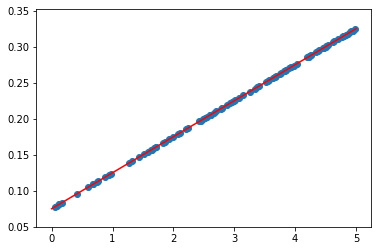

In [0]:
import numpy as np
import matplotlib.pyplot as plt

epoch = 100

axis = np.linspace(0,5,epoch)
data_x = []
data_y = []
m = 2

def p(x):
  return (2*x+3)/40
n = 0

while n<epoch:

  x = np.random.uniform(0,5)
  #p(x) = (2*x+3)/40
  r = p(x) / (0.2*m)
  u = np.random.uniform(0,1)
  if(r>u):
    data_x.append(x)
    data_y.append(p(x))
    n += 1

y_plot = p(axis)

plt.scatter(data_x,data_y)
plt.plot(axis, y_plot, color = 'r')
plt.show()


      



## Gibbs sampling

Gibbs sampling is the basic MCMC method and the special case of Metropolis-hastings algorithm.

### MCMC

Concept of markov chain is the future action is not depend on the previous action up to present state, or the future is independent of the part.

---


In the book "the art of conjecturing",J. Bernoulli (1713) concludes with the following words (Bernoulli 1986): "This, finally, causes the apparently singular corollary: if observations of all events be continued for the entire infinity (with probability
finally turning into complete certitude), it will be noticed that everything in
the world is governed by precise ratios and a constant law of changes, so that
even in things to the highest degree casual and fortuitous we would be
compelled to admit as though some necessity and, I may say, fate." [Ref](https://www.amazon.com/Randomness-Hyper-randomness-Mathematical-Engineering-Gorban-ebook/dp/B0759NKS67/ref=sr_1_1?keywords=Randomness+and+Hyper-randomness&qid=1581965899&sr=8-1)

---

![alt text](https://drive.google.com/uc?id=1oswcSYmC9uHnESRur5eGIT-DK_8_LmKL)


### Algorithm

0. Initial parameter set $z^{j=0}= \text{initial parameter}$
1. set j=j+1
2. Sample parameter $z^j_i$ from distribution $p(z^j_i \mid z^{j-1}_{k \neq i}) $

![alt text](https://drive.google.com/uc?id=1iJmqmTaok4pSOTRGrzDpLhdf8Ci5dqZB)

In [5]:
import numpy as np

dist = [[0.2,0.1],
        [0.4,0.3]]
dist = np.array(dist)

x = np.random.randint(0,2)
y = np.random.randint(0,2)

n = 10000

rec = []

for i in range(n):
  d = dist[:,x]
  d = d/d.sum()
  u = np.random.uniform()
  if u<d[0]:
    y = 0
  else:
    y=1

  rec.append([x,y])  
  d = dist[y,:]
  d = d/d.sum()
  u = np.random.uniform()
  if u<d[0]:
    x = 0
  else:
    x = 1
  rec.append([x,y])
all_data = len(rec)

p00 = rec.count([0,0])/all_data
p01 = rec.count([0,1])/all_data
p10 = rec.count([1,0])/all_data
p11 = rec.count([1,1])/all_data

print("p00",p00)
print("p01",p01)
print("p10",p10)
print("p11",p11)




p00 0.2003
p01 0.4026
p10 0.0992
p11 0.2979


## Metropolis-Hastings sampling

### Algorithm

1. intialize starting parameter and set $\theta^{j=0} = S$ set j = 1
2. Draw candidate parameter $\theta^c$ from proposal density q()
3. Compute the ratio $R = \frac{p(\theta^c)q(\theta^{j-1} \mid \theta^c) }{p(\theta^{j-1})q(\theta^c \mid \theta^{j-1})}$
4. sample $u \thicksim U(0,1)$. If R>u then set $\theta^{j} = \theta^c$ else $\theta^j = \theta^{j-1}$
5. set j = j+1 return to step 2

# Reference

1. Pattern Recognition and Machine Learning (Information Science and Statistics) [Amazon](https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738/ref=sr_1_1?crid=2HA6Y1WFBEXK7&keywords=pattern+recognition+and+machine+learning&qid=1581843216&sprefix=pattern+re%2Caps%2C396&sr=8-1)

2. Introduction to Applied Bayesian Statistics and Estimation for Social Scientists [Amazon](https://www.amazon.com/Introduction-Statistics-Estimation-Scientists-Behavioral/dp/038771264X/ref=sr_1_11?keywords=statistics+for+the+social+and+behavioral+sciences&qid=1581844192&sr=8-11)

3. Deep bayes [Youtube](https://www.youtube.com/playlist?list=PLe5rNUydzV9QHe8VDStpU0o8Yp63OecdW)